This homework has been completed in colaboration with:
Ekaterina Kolesnikova
Amol Kodan
Camellia Bai 

link to download our training data: 
https://drive.google.com/file/d/1nTxTNteV63ewEbye2l99gIsMWf2aAZeR/view?usp=sharing


In [2]:

import sklearn
import seaborn
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Import decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import train, test, and evaluation functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [1]:
from bs4 import BeautifulSoup
import re
import time
import requests
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import pandas as pd


pageLink = 'https://www.rottentomatoes.com/top/bestofrt/top_100_horror_movies/'
path = "/Users/katia/Desktop/chromedriver"
browser = webdriver.Chrome(path)
browser.get(pageLink)
page_source = browser.page_source
soup = BeautifulSoup(page_source, 'lxml')

allmovies = soup.findAll('table', {'class': 'table'})

movie_list = []
for name in allmovies:
    for row in name('tr')[1:]:
        movie_name = row.find('a', {"class":"unstyled articleLink"})
        movie_name = str(movie_name)
        movie_list.append(movie_name)      

movieurl = []
for x in movie_list:
    mname = re.findall('(/m/.+)">', x)
    #print(mname)
    movieurl.append(mname)
print(movieurl)

browser.quit()

[['/m/us_2019'], ['/m/get_out'], ['/m/the_cabinet_of_dr_caligari'], ['/m/a_quiet_place_2018'], ['/m/the_invisible_man_2020'], ['/m/nosferatu'], ['/m/1011615-king_kong'], ['/m/psycho'], ['/m/bride_of_frankenstein'], ['/m/the_babadook'], ['/m/1007818-frankenstein'], ['/m/the_lighthouse_2019'], ['/m/it_follows'], ['/m/hereditary'], ['/m/let_the_right_one_in'], ['/m/freaks'], ['/m/1009113-halloween'], ['/m/1000617-aliens'], ['/m/night_of_the_living_dead'], ['/m/silence_of_the_lambs'], ['/m/rosemarys_baby'], ['/m/eyes_without_a_face_1962'], ['/m/pans_labyrinth'], ['/m/repulsion'], ['/m/host_2020'], ['/m/possessor_uncut'], ['/m/the_cabin_in_the_woods'], ['/m/the_witch_2016'], ['/m/1010695-invisible_man'], ['/m/dont_look_now'], ['/m/it_2017'], ['/m/relic'], ['/m/1211532-friends_of_eddie_coyle'], ['/m/1002448-birds'], ['/m/young_frankenstein'], ['/m/ready_or_not_2019'], ['/m/the_vanishing'], ['/m/drag_me_to_hell'], ['/m/a_girl_walks_home_alone_at_night'], ['/m/godzilla_1956'], ['/m/1007600-fly

In [2]:
flattened = [val for sublist in movieurl for val in sublist]
print(flattened)

['/m/us_2019', '/m/get_out', '/m/the_cabinet_of_dr_caligari', '/m/a_quiet_place_2018', '/m/the_invisible_man_2020', '/m/nosferatu', '/m/1011615-king_kong', '/m/psycho', '/m/bride_of_frankenstein', '/m/the_babadook', '/m/1007818-frankenstein', '/m/the_lighthouse_2019', '/m/it_follows', '/m/hereditary', '/m/let_the_right_one_in', '/m/freaks', '/m/1009113-halloween', '/m/1000617-aliens', '/m/night_of_the_living_dead', '/m/silence_of_the_lambs', '/m/rosemarys_baby', '/m/eyes_without_a_face_1962', '/m/pans_labyrinth', '/m/repulsion', '/m/host_2020', '/m/possessor_uncut', '/m/the_cabin_in_the_woods', '/m/the_witch_2016', '/m/1010695-invisible_man', '/m/dont_look_now', '/m/it_2017', '/m/relic', '/m/1211532-friends_of_eddie_coyle', '/m/1002448-birds', '/m/young_frankenstein', '/m/ready_or_not_2019', '/m/the_vanishing', '/m/drag_me_to_hell', '/m/a_girl_walks_home_alone_at_night', '/m/godzilla_1956', '/m/1007600-fly', '/m/1010030-house_of_wax', '/m/1006234-dracula', '/m/midsommar', '/m/1003625-c

In [3]:
pageNum = 2

In [4]:
urls = []
for url in flattened:
    pageLink = 'https://www.rottentomatoes.com/'+ url +'/reviews/'
    urls.append(pageLink)
    

In [5]:
def check_exists_by_xpath(xpath):
    try:
        browser.find_element_by_xpath(xpath)
    except NoSuchElementException:
        return False
    return True

In [8]:
testurl = urls
#pulling 100 movies is way too long, this is just a smaller set

In [9]:
with open('katias_scraper.txt','w') as fw:
    
    browser = webdriver.Chrome(path)

    for url in testurl:
        browser.get(url)
        
          
        # for each page 
        for p in range(0,pageNum): 
                print ('page',p+1)
        
                # if we got the page parse the html 
                page_source = browser.page_source
                soup = BeautifulSoup(page_source, 'lxml')
        
                # get all the review divs
                reviews=soup.findAll('div', {'class':re.compile('review_table_row')})
        
                # grab the information for each review
                for review in reviews:
            
                    # initialize critic, rating, source, text, date
                    critic,rating,source,text,date='NA','NA','NA','NA','NA'
            
                    criticChunk=review.find('a',{'href':re.compile('/critics/(.)')})
                    if criticChunk: 
                        critic=criticChunk.text.strip()
            
                    ratingChunk=review.find('div',{'class':re.compile('review_icon icon small')})
                    if ratingChunk:
                        new = str(ratingChunk).split()
                        x = new[-2]
                        rating = x.split('"')[0]
                                                                  
                    sourceChunk = review.find('em',{'class':re.compile('subtle critic-publication')})  
                    if sourceChunk:
                        source = sourceChunk.text.strip()
                    #sources.append(source)
                
                    textChunk = review.find('div',{'class':re.compile('the_review')})          
                    if textChunk:
                        text = textChunk.text.strip()
                
                    dateChunk = review.find('div',{'class':re.compile('review-date subtle small')})
                    if dateChunk:
                        date = dateChunk.text.strip()
              
            
                #write everything to file    
                    fw.write(critic+'\t'+rating+'\t'+source+'\t'+text+'\t'+date+'\n')
        
            #moving to next page
                if (check_exists_by_xpath('//button[@class="js-prev-next-paging-next btn prev-next-paging__button prev-next-paging__button-right"]')):
                    if p < pageNum:
                        browser.find_element_by_xpath('//button[@class="js-prev-next-paging-next btn prev-next-paging__button prev-next-paging__button-right"]').click()
                        time.sleep(2)
        
# close the browser
browser.quit()

page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1
page 2
page 1

In [3]:
column_names = ['critic', 'rating', 'source', 'review', 'time']
data = pd.read_csv("katias_scraper.txt",sep = "\t",delim_whitespace=False,header=None,names=column_names)



In [7]:
pwd

'/Users/camillebai/Downloads'

In [6]:
data.head(10)

,critic,rating,source,review,time
0,Lonita Cook,fresh,KCTV5 News at 9,It grips you immediately.,"Sep 30, 2021"
1,Taylor Baker,fresh,Drink in the Movies,Episode 32: Captive State / Pandorum / Mirror ...,"Sep 14, 2021"
2,Rick Marshall,fresh,Digital Trends,It doesn't pack the psychological punch of Get...,"Jul 13, 2021"
3,Nicolás Delgadillo,fresh,Discussing Film,"Similar to his first film, Peele practically d...","Jun 25, 2021"
4,Dan Stubbs,fresh,NME,It's a film that confirms Peele as that rarest...,"May 11, 2021"
5,Nick Levine,fresh,NME,Jordan Peele returns with another inventive an...,"May 11, 2021"
6,Michael J. Casey,fresh,Michael J. Cinema,"There's a messiness here, a beautiful anamorph...","Mar 13, 2021"
7,Cassidy Olsen,fresh,The Improper Bostonian,Us introduces so many ideas that it can be dif...,"Mar 8, 2021"
8,Richard Crouse,fresh,Richard Crouse,An outlandish story but the powerful message r...,"Mar 4, 2021"
9,Alex Bentley,fresh,CultureMap,"While imperfect, Peele and his team get enough...","Feb 18, 2021"


In [7]:
data.describe()

,critic,rating,source,review,time
count,4000,4000,4000,3781,4000
unique,1411,2,888,3777,1921
top,Mike Massie,fresh,Time Out,Episode 13: Raison D'être,"Oct 8, 2020"
freq,49,3704,56,3,45


In [5]:
# Import pandas to read in data
import numpy as np
import pandas as pd

# Import models and evaluation functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Import vectorizers to turn text into numeric
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import plotting
import matplotlib.pylab as plt
%matplotlib inline

In [9]:
X = data["review"]
Y = data["rating"]
X

0                               It grips you immediately.
1       Episode 32: Captive State / Pandorum / Mirror ...
2       It doesn't pack the psychological punch of Get...
3       Similar to his first film, Peele practically d...
4       It's a film that confirms Peele as that rarest...
                              ...                        
3995                                                  NaN
3996                   Horror-spoof musical is goofy fun.
3997    It takes a little genius to turn a Z-grade Cor...
3998      Watered with laughs, sprouting with boppy music
3999    The film represents a rare example where Holly...
Name: review, Length: 4000, dtype: object

In [10]:
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))

data['review'] = data.review.apply(lambda X: np.str_(X))


data['newreview'] = data.review.apply(lambda x: ' '.join([word for word in x.split() if word not in(stop)]))

XNEW = data['newreview']

XNEW


0                                   It grips immediately.
1       Episode 32: Captive State / Pandorum / Mirror ...
2       It pack psychological punch Get Out, Us confir...
3       Similar first film, Peele practically demands ...
4       It's film confirms Peele rarest things - true ...
                              ...                        
3995                                                  nan
3996                      Horror-spoof musical goofy fun.
3997    It takes little genius turn Z-grade Corman hor...
3998                Watered laughs, sprouting boppy music
3999    The film represents rare example Hollywood app...
Name: newreview, Length: 4000, dtype: object

In [12]:
# Create a vectorizer that will track text as binary features
binary_vectorizer = CountVectorizer()

# Let the vectorizer learn what tokens exist in the text data
binary_vectorizer.fit(XNEW)

# Turn these tokens into a numeric matrix
X = binary_vectorizer.transform(XNEW)
X

<4000x10155 sparse matrix of type '<class 'numpy.int64'>'
	with 50140 stored elements in Compressed Sparse Row format>

In [13]:
# Create a model
logistic_regression = LogisticRegression(max_iter=100000)

# Use this model and our data to get 5-fold cross validation

from sklearn.model_selection import cross_val_score
accs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average accuracy rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(accs), 3)))

Accuracy of our classifier is 0.924


In [14]:
# Create a vectorizer that will track text as binary features
tfidf_vectorizer = TfidfVectorizer()

# Let the vectorizer learn what tokens exist in the text data
tfidf_vectorizer.fit(XNEW)

# Turn these tokens into a numeric matrix
X = tfidf_vectorizer.transform(XNEW)

# Create a model
logistic_regression = LogisticRegression(max_iter=100000)

# Use this model and our data to get 5-fold cross validation AUCs
aucs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(aucs), 3)))

Accuracy of our classifier is 0.926


In [16]:
c_vec = CountVectorizer(ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(XNEW)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
data_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram/trigram'})

data_ngram

,frequency,bigram/trigram
0,141,full review
1,139,review spanish
2,138,full review spanish
3,108,horror film
4,67,horror movie
...,...,...
82488,1,10 movies
82489,1,10 best british
82490,1,10 best
82491,1,000 shot 20


In [17]:
%pip install -U textblob
%conda install -c conda-forge textblob

from textblob import TextBlob


Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [19]:
data['polarity'] = XNEW.apply(lambda x: TextBlob(x).polarity)
data['subjective'] = XNEW.apply(lambda x: TextBlob(x).subjectivity)
data

,critic,rating,source,review,time,newreview,polarity,subjective
0,Lonita Cook,fresh,KCTV5 News at 9,It grips you immediately.,"Sep 30, 2021",It grips immediately.,0.000000,0.000000
1,Taylor Baker,fresh,Drink in the Movies,Episode 32: Captive State / Pandorum / Mirror ...,"Sep 14, 2021",Episode 32: Captive State / Pandorum / Mirror ...,0.200000,0.600000
2,Rick Marshall,fresh,Digital Trends,It doesn't pack the psychological punch of Get...,"Jul 13, 2021","It pack psychological punch Get Out, Us confir...",0.250000,0.300000
3,Nicolás Delgadillo,fresh,Discussing Film,"Similar to his first film, Peele practically d...","Jun 25, 2021","Similar first film, Peele practically demands ...",0.083333,0.244444
4,Dan Stubbs,fresh,NME,It's a film that confirms Peele as that rarest...,"May 11, 2021",It's film confirms Peele rarest things - true ...,0.350000,0.650000
...,...,...,...,...,...,...,...,...
3995,Philip Martin,fresh,Arkansas Democrat-Gazette,nan,"Feb 28, 2003",nan,0.000000,0.000000
3996,James Rocchi,fresh,Netflix,Horror-spoof musical is goofy fun.,"Nov 7, 2002",Horror-spoof musical goofy fun.,0.266667,0.400000
3997,Rob Vaux,fresh,Flipside Movie Emporium,It takes a little genius to turn a Z-grade Cor...,"Oct 15, 2002",It takes little genius turn Z-grade Corman hor...,-0.093750,0.275000
3998,Caffeinated Clint,fresh,Moviehole,"Watered with laughs, sprouting with boppy music","Sep 17, 2002","Watered laughs, sprouting boppy music",0.000000,0.000000


# to check polarity and	subjective against rating visualization

In [33]:
plottry = data.loc[1:100]

<AxesSubplot:xlabel='subjective', ylabel='rating'>

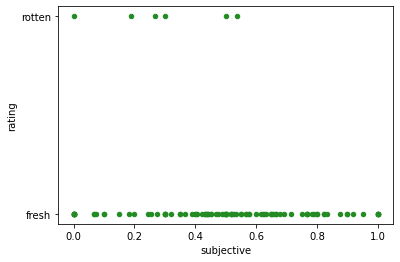

In [34]:
plottry.plot(kind="scatter", x="subjective", c = 'forestgreen', y="rating")

<AxesSubplot:xlabel='polarity', ylabel='rating'>

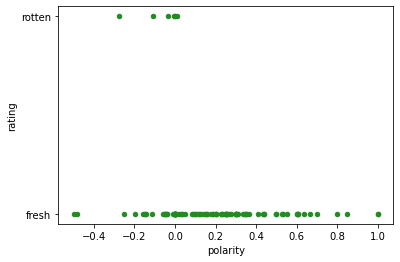

In [35]:
plottry.plot(kind="scatter", x="polarity", c = 'forestgreen', y="rating")

array([<AxesSubplot:title={'center':'polarity'}, xlabel='rating'>,
       <AxesSubplot:title={'center':'subjective'}, xlabel='rating'>],
      dtype=object)

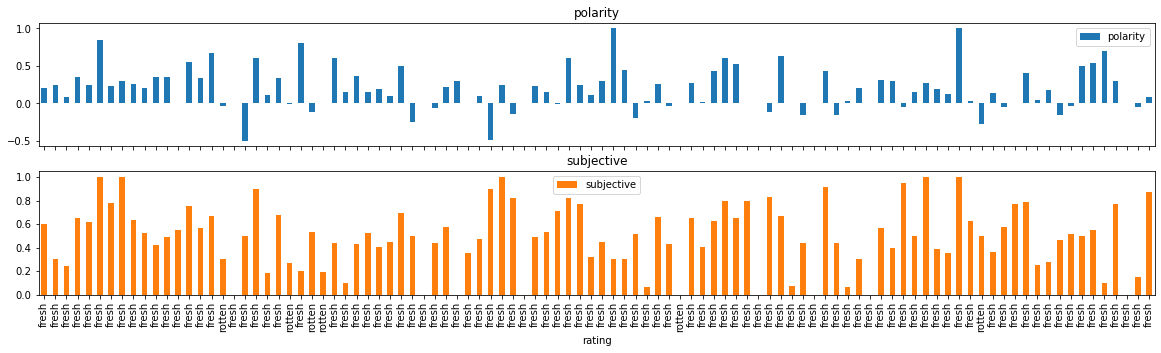

In [36]:
plottry.plot( x = "rating", kind = "bar", figsize = (20,5), subplots=True)